In [13]:
import numpy as np

import matplotlib.pyplot as plt

from numba import njit, vectorize, float32

from monk import nb

from typing import Callable, Optional

import hoomd
import hoomd.forward_flux.forward_flux as ffs
import gsd.hoomd

from monk import prep
from monk import pair
import ex_render

In [57]:
cpu = hoomd.device.CPU()
seed = 3412
sim = ffs.ForwardFluxSimulation(cpu, 3, seed=seed)

In [58]:
sim.create_state_from_gsd("equil-system-T0.1.gsd")

In [59]:
sim.run(0)

In [60]:
integrator = hoomd.md.Integrator(dt=0.0025)
tree = hoomd.md.nlist.Tree(0.3)
# lj = pair.KA_LJ_DPD(tree, 0.01)
lj = pair.KA_LJ(tree)

lang = hoomd.md.methods.Langevin(hoomd.filter.All(), 0.1)
# lang = hoomd.md.methods.NVE(hoomd.filter.All())
integrator.forces = [lj]
integrator.methods = [lang]

sim.operations.integrator = integrator
pos = sim.state.get_snapshot().particles.position
trigger = hoomd.trigger.Periodic(1)
remove_drift = hoomd.update.RemoveDrift(pos, trigger)
sim.operations.updaters.clear()
sim.operations.updaters.append(remove_drift)

writer = hoomd.write.GSD(trigger=hoomd.trigger.Periodic(1), filename="another-test3.gsd", mode="wb", filter=hoomd.filter.All())
sim.operations.writers.clear()
sim.operations.writers.append(writer)

In [61]:
sim.run(1000, write_at_start=True)

In [18]:
sim.run(100_000)

In [29]:
pos = sim.state.get_snapshot().particles.position
trigger = hoomd.trigger.Periodic(1)
remove_drift = hoomd.update.RemoveDrift(pos, trigger)
sim.operations.updaters.clear()
sim.operations.updaters.append(remove_drift)

In [20]:
sim.timestep

2310000

In [30]:
remove_drift.reference_positions

array([[-1.23303728, -3.04891509,  3.22488514],
       [ 3.33729248,  0.19338162, -3.67550147],
       [ 2.03025808,  2.30569709,  3.61658207],
       ...,
       [-0.70652693,  1.80891661,  2.11971008],
       [ 2.77922551,  0.84180588,  2.87546344],
       [-2.71315902, -1.07347174,  3.12425546]])

In [28]:
snap = sim.state.get_snapshot()
snap.particles.position

array([[-1.23303728, -3.04891509,  3.22488514],
       [ 3.33729248,  0.19338162, -3.67550147],
       [ 2.03025808,  2.30569709,  3.61658207],
       ...,
       [-0.70652693,  1.80891661,  2.11971008],
       [ 2.77922551,  0.84180588,  2.87546344],
       [-2.71315902, -1.07347174,  3.12425546]])

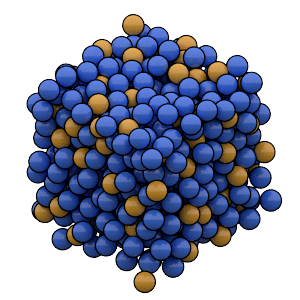

In [30]:
ex_render.render_sphere_frame(frame=sim.state.get_snapshot())

In [6]:
sim.run(100_000)

In [21]:
len(sim.operations.updaters)

1

In [7]:
sim.operations.updaters._sync(sim, sim._cpp_sys.updaters)

In [22]:
print(sim._cpp_sys.updaters)

UpdaterList[0x55cf08a6e940]


In [23]:
print(sim._cpp_sys.analyzers)

AnalyzerList[]


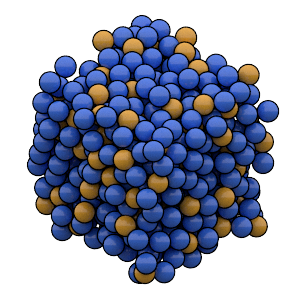

In [24]:
ex_render.render_sphere_frame(frame=sim.state.get_snapshot())

In [42]:
snap.particles.typeid[20]

0

In [43]:
sim._cpp_sys.setPID(20)

In [44]:
basin_op = sim.sample_basin(1_000, 10)

(array([17.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 52., 28.]),
 array([3.05715544, 3.13213622, 3.20711699, 3.28209776, 3.35707854,
        3.43205931, 3.50704009, 3.58202086, 3.65700163, 3.73198241,
        3.80696318]),
 <BarContainer object of 10 artists>)

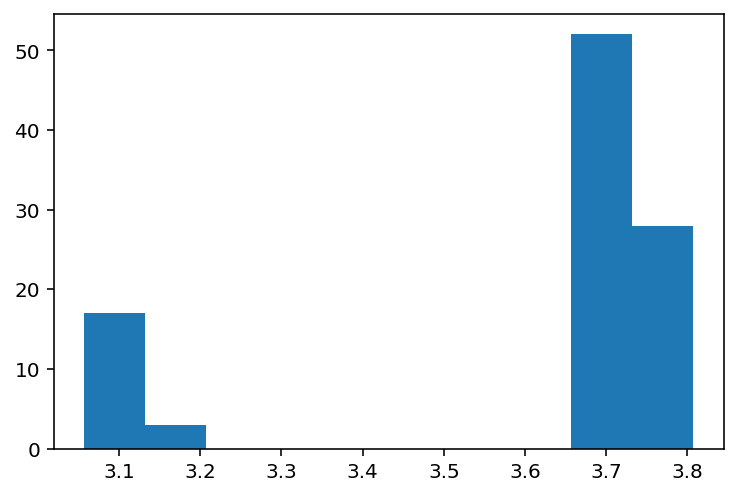

In [45]:
plt.hist(basin_op)

In [39]:
sim._pid = 20

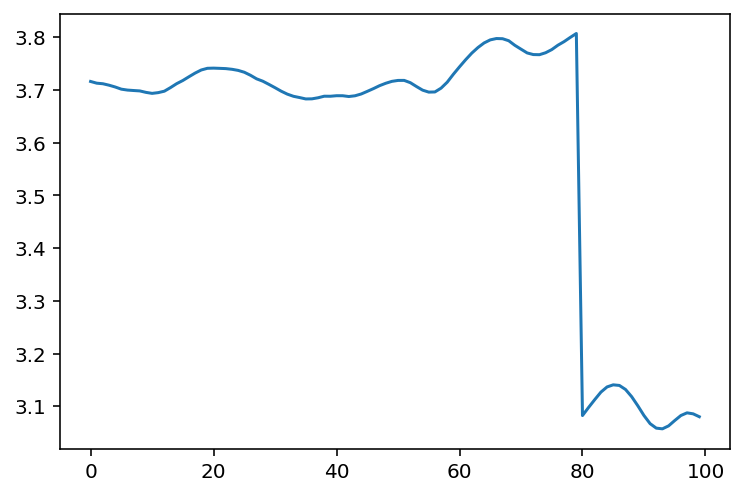

In [46]:
plt.plot(basin_op)

In [11]:
writer = hoomd.write.GSD(trigger=hoomd.trigger.Periodic(10), filename="another-test2.gsd", mode="xb", filter=hoomd.filter.All())
sim.operations.writers.clear()
sim.operations.writers.append(writer)
sim.run(100_000)